# Create and train network

create and train network

In [37]:
import csv

dim = 11
size = pow(2, dim)

data_file = open(f'data{dim}.csv', mode='r')
dreader = csv.reader(data_file, delimiter=',')

target_file = open(f'target{dim}.csv', mode='r')
treader = csv.reader(target_file, delimiter=',')

In [38]:
data = []
target = []
for row in dreader:
    y = []
    for x in row:
        y.append(float(x))
    data.append(y)
    
for row in treader:
    y = []
    for x in row:
        y.append(float(x))
    target.append(y)
    
print(len(data))
print(len(target))

2048
2048


In [41]:
import time
import random
from neural.neuralNetwork import neuralNetwork


random.seed(144)
input_nodes = dim
hidden_nodes = dim * 4
output_nodes = dim + 1
# learning rate is 0.3
learning_rate = 0.3
# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# start traing sessions
sessions = 200
nst = int(size / 2) 
print(nst)

x = []
y_avg = []
y_min = []
y_dev = []

ind = list(range(size))
random.shuffle(ind)
t_start = time.time()
for js in range(sessions):
    tind = ind[:nst]
    random.shuffle(tind)
    for i in range(nst):
        nn.train(data[tind[i]], target[tind[i]])
    if True:
        ss = 0.0
        ss2 = 0.0
        max = 0.0
        for i in range(nst, size):
            res = nn.query(data[ind[i]])
            s = 0.0
            for j in range(2, dim -2):
                s += pow(res[j, 0]-target[ind[i]][j], 2)
            y = []
            z = []
            for j in range(dim + 1):
                y.append(format(res[j,0], '.1f'))
            for k in target[ind[i]]:
                z.append(format(k, '.1f'))
            # big error    
            #if s > 1.95:
            #    print(data[ind[i]], y)
            ss += s
            ss2 += s*s
            if s > max:
                max = s
        avg = ss / nst
        var = ss2 / nst
        dev = pow(var - avg*avg, 0.5)
        #print('avg=', format(avg, '0.3f'), " dev=", format(dev, '0.3f'), " max err=", format(max, '0.3f'))
        x.append(js)
        y_avg.append(avg)
        y_min.append(max)
        y_dev.append(dev)
t = time.time() - t_start
print ("Training done, it took ", t, " secs")

1024
Training done, it took  32.42913341522217  secs


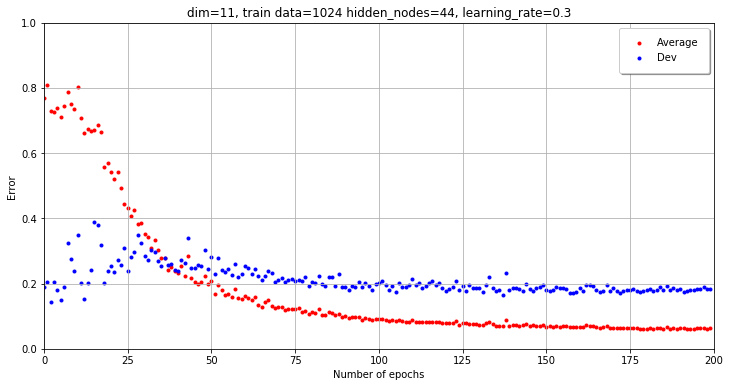

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
ax = plt.axes()
plt.scatter(x, y_avg, marker='.', color='red', label='Average')
plt.scatter(x, y_dev, marker='.', color='blue', label='Dev')
#plt.scatter(x, y_min, marker='.', color='green', label='Max')
plt.xlim(0, sessions)
plt.ylim(0, 1)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title(f'dim={dim}, train data={nst} hidden_nodes={hidden_nodes}, learning_rate={learning_rate}')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);


In [43]:
plt.savefig('d10-hn400.png')

<Figure size 432x288 with 0 Axes>